In [1]:
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image, UnidentifiedImageError
import requests
from io import BytesIO
import matplotlib.pyplot as plt

In [2]:
headers = {
    "User-Agent": "CLIPImageClassifierBot/1.0 (https://example.com/contact; myemail@example.com)"
}


model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")


image_urls = [
    "https://media.istockphoto.com/id/2040351154/de/foto/hund-mit-t%C3%BCrkischer-flagge-bei-side-arch%C3%A4ologisch.jpg?s=2048x2048&w=is&k=20&c=6Re5W8SE-jyeDG5MRdOJpCoDFk0THtvZm3YGj7ZnIz8=",
    "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Felis_catus-cat_on_snow.jpg/640px-Felis_catus-cat_on_snow.jpg",
    "https://cdn.pixabay.com/photo/2012/04/12/23/48/car-30990_1280.png",
    "https://t4.ftcdn.net/jpg/03/83/25/83/240_F_383258331_D8imaEMl8Q3lf7EKU2Pi78Cn0R7KkW9o.jpg"
]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [3]:
images = []
for url in image_urls:
    try:
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()
        if "image" not in response.headers.get("content-type", ""):
            print(f"Skipping {url}: Not an image (content-type: {response.headers.get('content-type')})")
            continue
        img = Image.open(BytesIO(response.content)).convert("RGB")
        images.append(img)
    except (requests.RequestException, UnidentifiedImageError) as e:
        print(f"Failed to load {url}: {e}")
        continue


text_prompts = [
    "a photo of a cat",
    "a photo of a dog",
    "a photo of a person",
    "a photo of a car",
    "a photo of a bird",
    "a photo of a flower"
]



Image 1 probabilities:
a photo of a cat: 0.0018
a photo of a dog: 0.9893
a photo of a person: 0.0021
a photo of a car: 0.0001
a photo of a bird: 0.0065
a photo of a flower: 0.0001
Best match: a photo of a dog


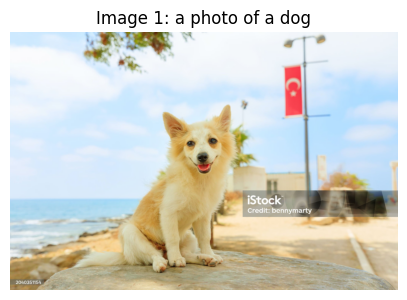


Image 2 probabilities:
a photo of a cat: 0.9950
a photo of a dog: 0.0035
a photo of a person: 0.0012
a photo of a car: 0.0001
a photo of a bird: 0.0002
a photo of a flower: 0.0000
Best match: a photo of a cat


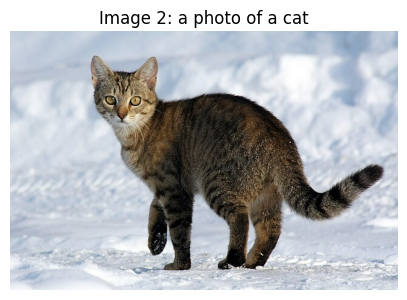


Image 3 probabilities:
a photo of a cat: 0.0013
a photo of a dog: 0.0009
a photo of a person: 0.0016
a photo of a car: 0.9954
a photo of a bird: 0.0006
a photo of a flower: 0.0003
Best match: a photo of a car


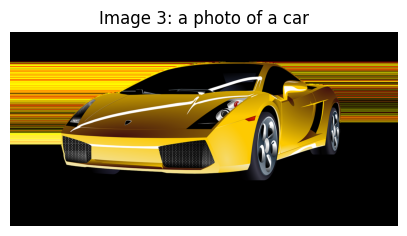


Image 4 probabilities:
a photo of a cat: 0.0004
a photo of a dog: 0.0007
a photo of a person: 0.9975
a photo of a car: 0.0002
a photo of a bird: 0.0009
a photo of a flower: 0.0004
Best match: a photo of a person


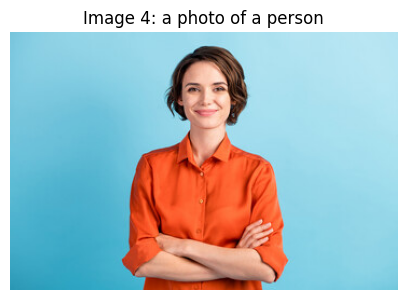

In [4]:
if not images:
    print("No valid images loaded. Exiting.")
else:
    inputs = processor(text=text_prompts, images=images, return_tensors="pt", padding=True)


    with torch.no_grad():
        outputs = model(**inputs)
        logits_per_image = outputs.logits_per_image
        probs = logits_per_image.softmax(dim=1)


    for i, (image, image_prob) in enumerate(zip(images, probs)):

        print(f"\nImage {i+1} probabilities:")
        for j, prob in enumerate(image_prob):
            print(f"{text_prompts[j]}: {prob.item():.4f}")
        best_match_idx = image_prob.argmax().item()
        best_match = text_prompts[best_match_idx]
        print(f"Best match: {best_match}")


        plt.figure(figsize=(5, 5))
        plt.imshow(image)
        plt.title(f"Image {i+1}: {best_match}")
        plt.axis("off")
        plt.show()